In [ ]:
pip install numpy pandas matplotlib seaborn scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("spam.csv" , encoding = "ISO-8859-1")

In [ ]:
df.sample(2)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2372,ham,Watching tv lor... Y she so funny we bluff her...,NaN,NaN,NaN
3759,ham,We'll join the &lt;#&gt; bus,NaN,NaN,NaN


In [ ]:
# 1) data cleaning
#2) EDA
# 3) text preprocesing
# 4) modle building
# 5) evaluation
# 6) improvements
# 7) website
# 8) depl0y

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.drop(columns = ['Unnamed: 2' , 'Unnamed: 3' , 'Unnamed: 4'] , axis = 1 , inplace = True)

In [ ]:
df.sample()

,v1,v2
3391,ham,What r u cooking me for dinner?


In [ ]:
#Now rename
df.rename(columns = {'v1' : 'target' , 'v2' : 'text'} , inplace = True)

In [ ]:
df.sample()

,target,text
2978,spam,"Xmas Offer! Latest Motorola, SonyEricsson & No..."


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df.target = encoder.fit_transform(df.target)

In [ ]:
df.sample(3)

,target,text
4756,0,"hey, looks like I was wrong and one of the kap..."
2363,1,Fantasy Football is back on your TV. Go to Sky...
4995,0,Happy new year. Hope you are having a good sem...


In [ ]:
df.isnull().sum()

,0
target,0
text,0


In [ ]:
df.duplicated().sum()

403

In [ ]:
df.drop_duplicates(keep="first" ,inplace = True)

In [ ]:
df.shape

(5169, 2)

# **EDA**

In [ ]:
df.target.value_counts()

,count
target,
0,4516
1,653


In [ ]:
#Abha sampling cheyali

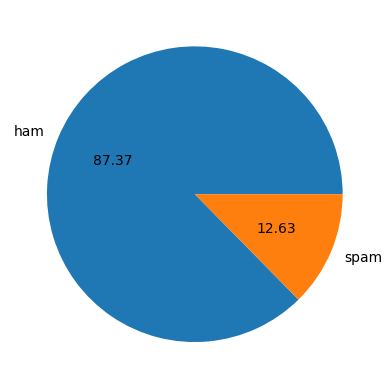

In [ ]:
plt.pie(df.target.value_counts() , labels = ['ham' , 'spam'] , autopct = "%0.2f")
plt.show()

In [ ]:
!pip install nltk

In [ ]:
import nltk

nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
df.columns

Index(['target', 'text'], dtype='object')

In [ ]:
#for each sentence count how many chars and append

df['num_characters'] = df.text.apply(len)

In [ ]:
df.sample(3)

,target,text,num_characters
2127,0,Tessy..pls do me a favor. Pls convey my birthd...,113
3062,1,"Hi babe its Jordan, how r u? Im home from abro...",147
3930,0,Nooooooo I'm gonna be bored to death all day. ...,72


In [ ]:
df['num_words'] = df.text.apply(lambda x: len(nltk.word_tokenize(x)))

In [ ]:
df.sample(3)

,target,text,num_characters,num_words
3325,0,Huh so fast... Dat means u havent finished pai...,52,11
3813,0,Can. Dunno wat to get 4 her...,30,9
4290,0,Call me when u're done...,25,7


In [ ]:
df['num_sentences'] = df.text.apply(lambda x: len(nltk.sent_tokenize(x)))

In [ ]:
df.sample(3)

,target,text,num_characters,num_words,num_sentences
5446,0,I am back. Good journey! Let me know if you ne...,104,26,4
2726,0,No i am not having not any movies in my laptop,46,11,1
171,0,"Hmmm.. Thk sure got time to hop ard... Ya, can...",94,25,2


In [ ]:
df.dtypes

,0
target,int64
text,object
num_characters,int64
num_words,int64
num_sentences,int64


In [ ]:
df[['num_characters' , 'num_words' , 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#only ham message details

df[df.target == 0][['num_characters' , 'num_words' , 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


<Axes: xlabel='num_characters', ylabel='Count'>

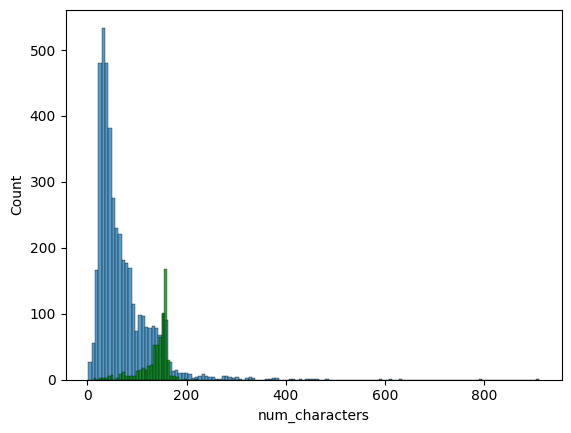

In [ ]:
sns.histplot(df[df.target == 0]['num_characters'])
sns.histplot(df[df.target == 1]['num_characters'] , color = 'g')

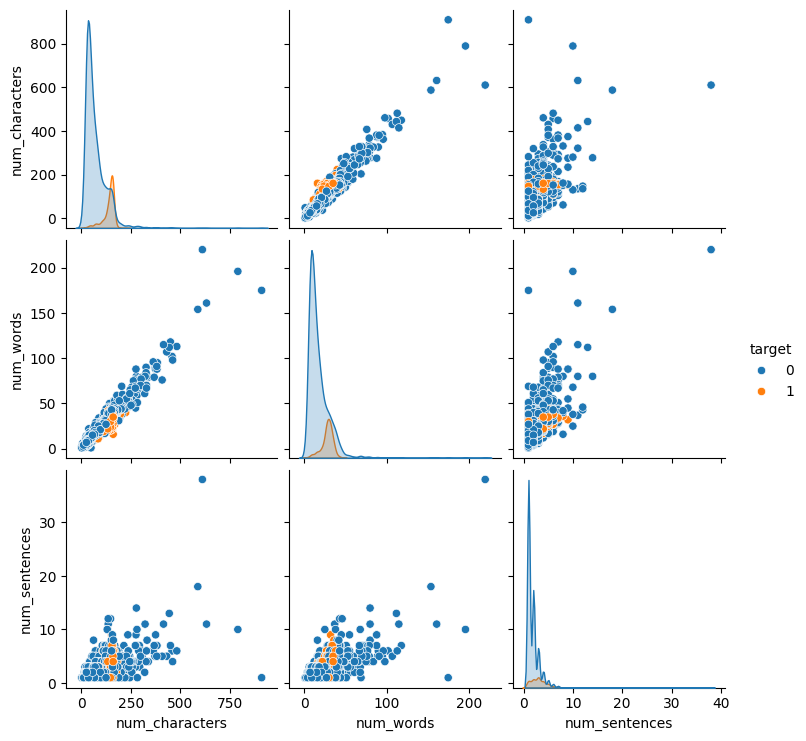

In [ ]:
sns.pairplot(df , hue = 'target')

<Axes: >

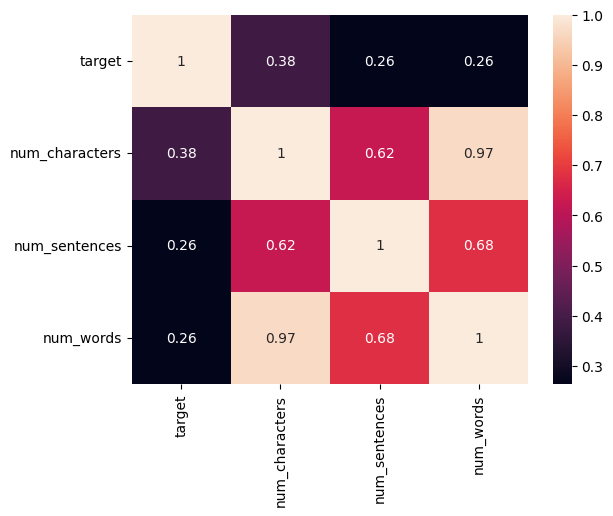

In [ ]:
sns.heatmap(df[[ 'target','num_characters' , 'num_sentences' , 'num_words']].corr() , annot = True)

#DATA PREPROCESSING

In [ ]:
# lowercase
# tokenization
# removing special chaarachters
# removing step words and punctuation
# stemming

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import string

In [ ]:
#lets define transform function that apply these steps to that text and return clean data

In [ ]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum(): #If the character is alpha numeric or not . random char ayte remove
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [ ]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [ ]:
df.sample()

,target,text,num_characters,num_words,num_sentences
1591,0,That's my honeymoon outfit. :),30,8,2


In [ ]:
df['transformed_text'] = df.text.apply(transform_text)

In [ ]:
df.sample(3)

,target,text,num_characters,num_words,num_sentences,transformed_text
3624,0,I want to tel u one thing u should not mistake...,87,22,1,want tel u one thing u mistak k messag sent
515,0,S:)no competition for him.,26,8,1,competit
161,0,New car and house for my parents.:)i have only...,64,19,2,new car hous parent new job hand


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width = 500 , height = 500 , min_font_size = 10 , background_color = 'white')

In [ ]:
spam_wc = wc.generate(df[df.target == 1]['transformed_text'].str.cat(sep = " "))

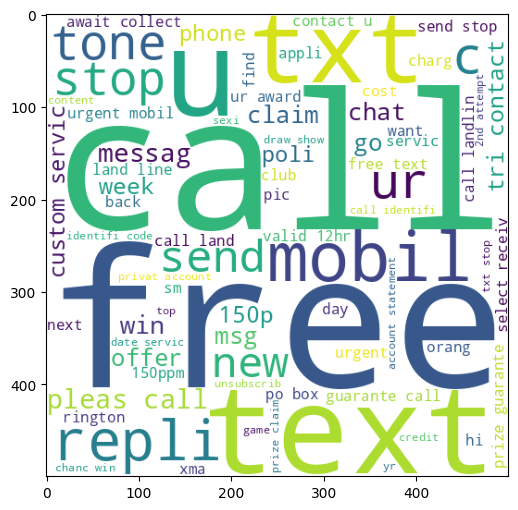

In [ ]:
plt.figure(figsize = (15 , 6))
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(df[df.target == 0]['transformed_text'].str.cat(sep = " "))

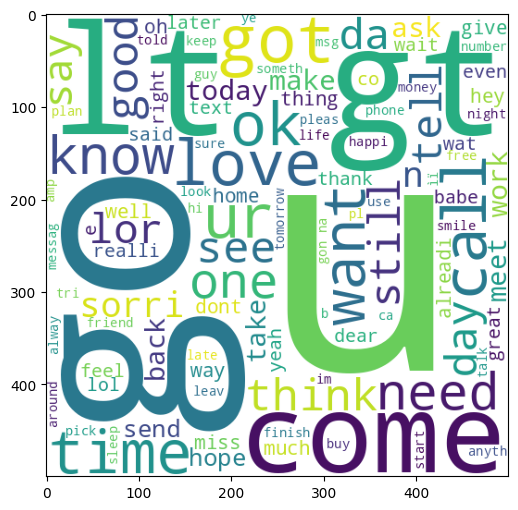

In [ ]:
plt.figure(figsize = (15 , 6))
plt.imshow(ham_wc)

In [ ]:
spam_corpus = []

for msg in df[df.target == 1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [ ]:
len(spam_corpus)

9939

In [ ]:
from collections import Counter

In [ ]:
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


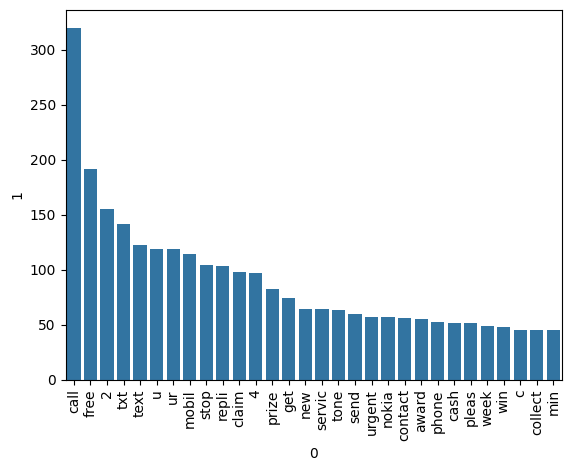

In [ ]:
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0] , y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [ ]:
ham_corpus = []

for msg in df[df.target == 0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [ ]:
len(ham_corpus)

35404

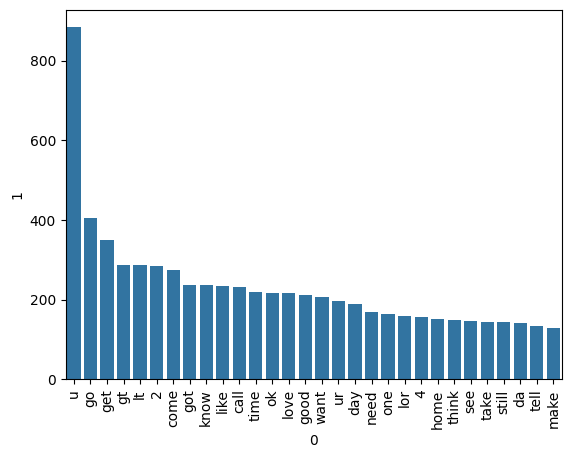

In [ ]:
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0] , y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

#MODEL BUILDING

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [ ]:
X = tfidf.fit_transform(df.transformed_text).toarray()

In [ ]:
X.shape

(5169, 3000)

In [ ]:
y = df.target.values

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 , random_state = 2)

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
#very bad output obtained

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [ ]:
mnb.fit(X_train,y_train)
y_pred1 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [ ]:
bnb.fit(X_train,y_train)
y_pred1 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [ ]:
import pickle
pickle.dump(tfidf , open('vectorizer.pkl' , 'wb'))
pickle.dump(mnb , open('model.pkl' , 'wb'))